# CMSE 830 Mid semester Project IDA, EDA, and Processing

## Name: Luke Hudak

This notebook contains all the data collection, preparation, IDA, EDA, and data processing for my CMSE 830 Mid semester project.

# Project overview

Goal: The goal of this project is to examine the relationship between government expenditure and citizen health for multiple countries over the span of multiple years. 

Datasets:
- The dataset containing life expectancy data and other health metrics was found on Kaggle, at the link: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated
- The dataset containing data on government expenditure was sourced from the World Bank Group, it was sourced via personalized query. Link: https://data.worldbank.org/indicator
  

# Data Collection and Preparation (IDA)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Loading in datasets and basic IDA

In [2]:
#load in life expectancy dataset
life_exp_df=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/Life-Expectancy-Data-Updated.csv")
#life_exp_df.head()
#life_exp_df.columns

#remove unwanted cols
life_exp_df=life_exp_df.drop([
    'GDP_per_capita',
    'Population_mln', 
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years', 
    'Schooling', 
    'Economy_status_Developed',
    'Economy_status_Developing'],axis=1)

#explore df
'''
life_exp_df.info()
life_exp_df.describe()
life_exp_df.shape
life_exp_df.dtypes
life_exp_df.isnull().sum()
life_exp_df.duplicated().sum() #no duplicated values
'''
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2864 non-null   object 
 1   Region               2864 non-null   object 
 2   Year                 2864 non-null   int64  
 3   Infant_deaths        2864 non-null   float64
 4   Under_five_deaths    2864 non-null   float64
 5   Adult_mortality      2864 non-null   float64
 6   Alcohol_consumption  2864 non-null   float64
 7   Hepatitis_B          2864 non-null   int64  
 8   Measles              2864 non-null   int64  
 9   BMI                  2864 non-null   float64
 10  Polio                2864 non-null   int64  
 11  Diphtheria           2864 non-null   int64  
 12  Incidents_HIV        2864 non-null   float64
 13  Life_expectancy      2864 non-null   float64
dtypes: float64(7), int64(5), object(2)
memory usage: 313.4+ KB


In [3]:
#load in government metrics df
gov_metrics_df=pd.read_csv("/Users/lukehudak/MSU/FS25/CMSE 830/World_Bank_data.csv")
#gov_metrics.head()

#drop time code
gov_metrics_df=gov_metrics_df.drop("Time Code",axis=1)

#rename columns
gov_metrics_df.columns=["Year","Country","Country_Code","Health_expenditure (% of GDP)", "Education_expenditure (% of GDP)", "R&D_expenditure (% of GDP)", "GDP_per_capita","Population"]

#drop last 5 rows(contains unwanted text)
gov_metrics_df=gov_metrics_df.drop(gov_metrics_df.tail(5).index)

#replace missing vals with na vals
gov_metrics_df.replace("..", np.nan, inplace=True)

#explore df
'''
gov_metrics_df.info()
gov_metrics_df.describe()
gov_metrics_df.shape
gov_metrics_df.dtypes
gov_metrics_df.isnull().sum()
gov_metrics_df.duplicated().sum() #no duplicated values
'''
#convert cols to specified data type
gov_metrics_df=gov_metrics_df.astype({
    "Year": "int",
    "Health_expenditure (% of GDP)": "float",
    "Education_expenditure (% of GDP)": "float",
    "R&D_expenditure (% of GDP)":"float",
    "GDP_per_capita":"float"
})
gov_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              5425 non-null   int64  
 1   Country                           5425 non-null   object 
 2   Country_Code                      5425 non-null   object 
 3   Health_expenditure (% of GDP)     4346 non-null   float64
 4   Education_expenditure (% of GDP)  3354 non-null   float64
 5   R&D_expenditure (% of GDP)        2110 non-null   float64
 6   GDP_per_capita                    5119 non-null   float64
 7   Population                        5425 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 339.2+ KB


## Merging datasets

In [4]:
#merge dfs
merged_df=pd.merge(
    life_exp_df,
    gov_metrics_df,
    how="left", #merge on left df (life exp) gets rid of years after 2015
    on=["Country","Year"])

#rename cols in merged df to all have same format
merged_df.rename(columns={
    "Country": "country",
    "Region": "region",
    "Year": "year",
    "Infant_deaths": "infant_deaths",
    "Under_five_deaths": "under_five_deaths",
    "Adult_mortality": "adult_mortality",
    "Alcohol_consumption": "alcohol_consumption",
    "Hepatitis_B": "hepatitis_b",
    "Measles": "measles",
    "BMI": "bmi",
    "Polio": "polio",
    "Diphtheria": "diphtheria",
    "Incidents_HIV": "incidents_hiv",
    "Life_expectancy": "life_expectancy",
    "Country_Code": "country_code",
    "Health_expenditure (% of GDP)": "health_expenditure_pct_gdp",
    "Education_expenditure (% of GDP)": "education_expenditure_pct_gdp",
    "R&D_expenditure (% of GDP)": "rnd_expenditure_pct_gdp",
    "GDP_per_capita": "gdp_per_capita",
    "Population": "population"
}, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        2864 non-null   object 
 1   region                         2864 non-null   object 
 2   year                           2864 non-null   int64  
 3   infant_deaths                  2864 non-null   float64
 4   under_five_deaths              2864 non-null   float64
 5   adult_mortality                2864 non-null   float64
 6   alcohol_consumption            2864 non-null   float64
 7   hepatitis_b                    2864 non-null   int64  
 8   measles                        2864 non-null   int64  
 9   bmi                            2864 non-null   float64
 10  polio                          2864 non-null   int64  
 11  diphtheria                     2864 non-null   int64  
 12  incidents_hiv                  2864 non-null   f

# Data Processing 

## Missingness

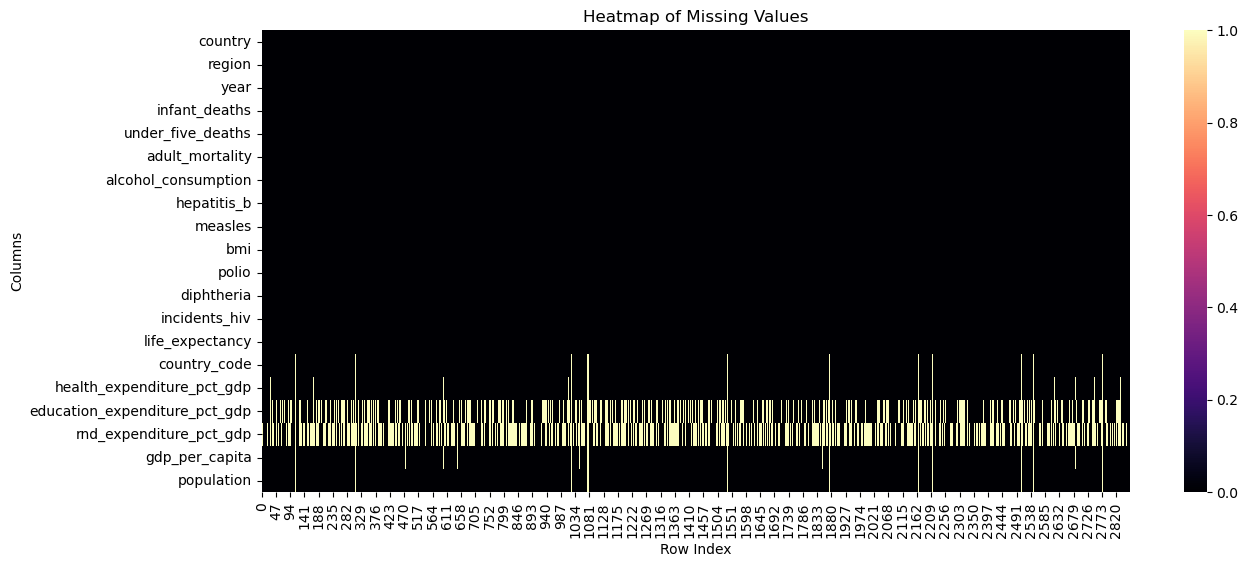

In [5]:
#heatmap to visualize missingness

plt.figure(figsize=(14, 6))
sns.heatmap(merged_df.isna().T, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.xlabel("Row Index")
plt.ylabel("Columns")
plt.show()

In [6]:
#calculate percentage of missing values for each variable
missing_proportion=merged_df.isna().mean()
missing_proportion*100

country                           0.000000
region                            0.000000
year                              0.000000
infant_deaths                     0.000000
under_five_deaths                 0.000000
adult_mortality                   0.000000
alcohol_consumption               0.000000
hepatitis_b                       0.000000
measles                           0.000000
bmi                               0.000000
polio                             0.000000
diphtheria                        0.000000
incidents_hiv                     0.000000
life_expectancy                   0.000000
country_code                      1.117318
health_expenditure_pct_gdp        2.688547
education_expenditure_pct_gdp    34.846369
rnd_expenditure_pct_gdp          52.234637
gdp_per_capita                    2.269553
population                        1.117318
dtype: float64

## Imputiaton

In [7]:
#examine correlations in variables first to determine best imputation method
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr = merged_df[numeric_cols].corr()
print(corr["health_expenditure_pct_gdp"].sort_values())

infant_deaths                   -0.617394
under_five_deaths               -0.577484
adult_mortality                 -0.487631
incidents_hiv                   -0.103809
population                      -0.075303
year                             0.079445
hepatitis_b                      0.218187
measles                          0.352059
diphtheria                       0.417846
polio                            0.424440
bmi                              0.458052
education_expenditure_pct_gdp    0.520531
gdp_per_capita                   0.550253
alcohol_consumption              0.556753
life_expectancy                  0.618041
rnd_expenditure_pct_gdp          0.630391
health_expenditure_pct_gdp       1.000000
Name: health_expenditure_pct_gdp, dtype: float64


### Stochastic Regression Method

In [8]:
#modify stochastic regression code from Week 6 ICA

from sklearn.linear_model import LinearRegression

#make coopy of df
imputed_df=merged_df.copy()

# define predictors and target
predictors = [
    'life_expectancy',
    'infant_deaths'] #chose life expectancy and infant deaths because i know there are no missing vals in those cols

target = 'health_expenditure_pct_gdp'

#separate target rows into missing and present
observed = imputed_df[imputed_df[target].notna()] 
missing = imputed_df[imputed_df[target].isna()]

#drop observed rows where predictors are missing
observed = observed.dropna(subset=predictors) #this code may be redundant because i omitted predictors with missing vals

X_train = observed[predictors]
y_train = observed[target]

# fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


x_missing = missing[predictors].dropna()
predicted_values = linear_model.predict(x_missing)

# Calculate residuals from the training set
residuals = y_train - linear_model.predict(X_train)

# Estimate the standard deviation of the residuals
residual_std = np.std(residuals)

#add noise to predicted vals
stoch_imputed=predicted_values + np.random.normal(0, residual_std, size=predicted_values.shape)

#keep imputed values above 0
stoch_imputed = np.maximum(stoch_imputed, 0)

#add stoch imputed values back into original df
imputed_df.loc[x_missing.index, target] = stoch_imputed

#check
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        2864 non-null   object 
 1   region                         2864 non-null   object 
 2   year                           2864 non-null   int64  
 3   infant_deaths                  2864 non-null   float64
 4   under_five_deaths              2864 non-null   float64
 5   adult_mortality                2864 non-null   float64
 6   alcohol_consumption            2864 non-null   float64
 7   hepatitis_b                    2864 non-null   int64  
 8   measles                        2864 non-null   int64  
 9   bmi                            2864 non-null   float64
 10  polio                          2864 non-null   int64  
 11  diphtheria                     2864 non-null   int64  
 12  incidents_hiv                  2864 non-null   f

### Median Imputaion Method

In [12]:
#median imputation
median_imputed_df = merged_df.copy()

#fill missing values with median of col
median_value = median_imputed_df['health_expenditure_pct_gdp'].median()
median_imputed_df['health_expenditure_pct_gdp'].fillna(median_value, inplace=True)

/var/folders/d7/7k64ck4x6s3fzvn9phwlvzmh0000gn/T/ipykernel_17756/495988582.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_imputed_df['health_expenditure_pct_gdp'].fillna(median_value, inplace=True)


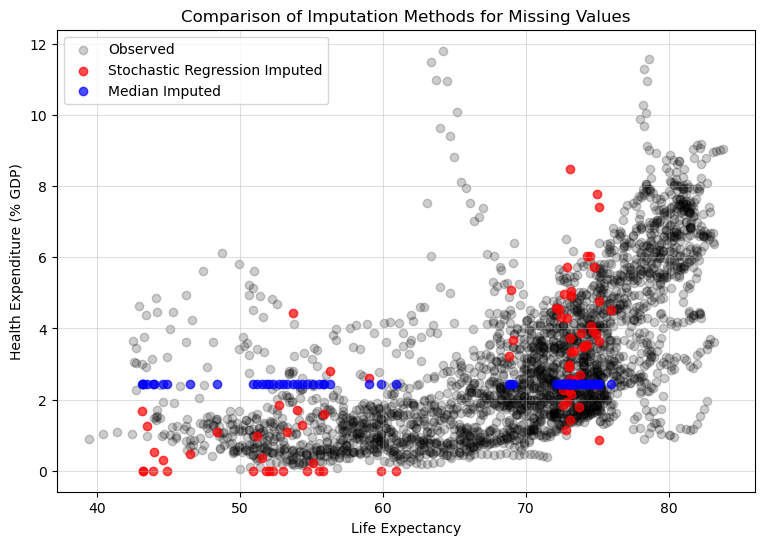

In [13]:
#Note: This section was generated with the help of ChatGPT (version 5-mini), accessed 10/19/15

# mask 
missing_mask = merged_df['health_expenditure_pct_gdp'].isna() #missing val mask
observed_mask = ~missing_mask #observed mask (inverse missing)

# x axis
x_observed = merged_df.loc[observed_mask, 'life_expectancy']
x_missing = merged_df.loc[missing_mask, 'life_expectancy']

#y axis
y_observed = merged_df.loc[observed_mask, 'health_expenditure_pct_gdp']
y_stochastic = imputed_df.loc[missing_mask, 'health_expenditure_pct_gdp']
y_median = median_imputed_df.loc[missing_mask, 'health_expenditure_pct_gdp']

# plot
plt.figure(figsize=(9,6))
plt.scatter(x_observed, y_observed, label='Observed', color='black', alpha=0.2) #observed vals
plt.scatter(x_missing, y_stochastic, label='Stochastic Regression Imputed', color='red', alpha=0.7) #stochastic vals
plt.scatter(x_missing, y_median, label='Median Imputed', color='blue', alpha=0.7) #median vals
plt.xlabel('Life Expectancy')
plt.ylabel('Health Expenditure (% GDP)')
plt.title('Comparison of Imputation Methods for Missing Values')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Encoding

In [16]:
#modify code from HW2
from sklearn.preprocessing import OneHotEncoder
# Copy dataframe
encoded_df = imputed_df.copy()

# fill missing vals in region
encoded_df['region_filled'] = encoded_df['region'].fillna('Unknown')

#one hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
region_encoded = onehot.fit_transform(encoded_df[['region_filled']])
region_names = onehot.categories_[0] #get col names
region_encoded_df = pd.DataFrame(region_encoded, columns=region_names, index=encoded_df.index) # create df 
encoded_df = pd.concat([encoded_df, region_encoded_df], axis=1) # add encoded df to original
encoded_df.drop(columns=['region_filled'], inplace=True) # drop region filled col

# check
encoded_df.head()

country          region  year  infant_deaths  under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   adult_mortality  alcohol_consumption  hepatitis_b  measles   bmi  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

     population  Africa  Asia  Central America and Caribbean European Union  \
0  7.821848e+07     0.0   0.0                            0.0            0.0   
1  4.642230e+07     0.0   0.0                            0.0            1.0   
2  1.190676e+09     0.0   1.0                            0.0            0.0   
3  7.589660e+05     0.0   0.0                            0.0            0.0   
4  7.910500e+06     0.0   0.0                            0.0            0.0   

   Middle East  North America  Oceania  Rest of Europe  South America  
0          1.0            0.0      0.0             0.0            0.0  
1          0.0            0.0      0.0             0.0            0.0  
2          0.0            0.0      0.0             0.0            0.0  
3          0.0            0.0      0.0             0.0            1.0  
4          1.0            0.0      0.0             0.0            0.0  

[5 rows x 29 columns]

## Exploratory Data Analysis and Visualization (EDA)

In [17]:
#stat summary of key variables
key_vars=["life_expectancy","health_expenditure_pct_gdp","infant_deaths", "adult_mortality", "education_expenditure_pct_gdp", "gdp_per_capita"]
stat_summary=imputed_df[key_vars].describe()
stat_summary

life_expectancy  health_expenditure_pct_gdp  infant_deaths  \
count      2864.000000                 2864.000000    2864.000000   
mean         68.856075                    3.015107      30.363792   
std           9.405608                    2.127565      27.538117   
min          39.400000                    0.000000       1.800000   
25%          62.700000                    1.356378       8.100000   
50%          71.400000                    2.445484      19.600000   
75%          75.400000                    4.258408      47.350000   
max          83.800000                   11.807887     138.100000   

       adult_mortality  education_expenditure_pct_gdp  gdp_per_capita  
count      2864.000000                    1866.000000     2799.000000  
mean        192.251775                       4.449564    11853.528654  
std         114.910281                       1.911690    17240.703620  
min          49.384000                       0.436955      252.806675  
25%         106.910250                       3.080817     1419.780563  
50%         163.841500                       4.225585     4280.801824  
75%         246.791375                       5.456067    12693.648916  
max         719.360500                      14.059080   112417.876989

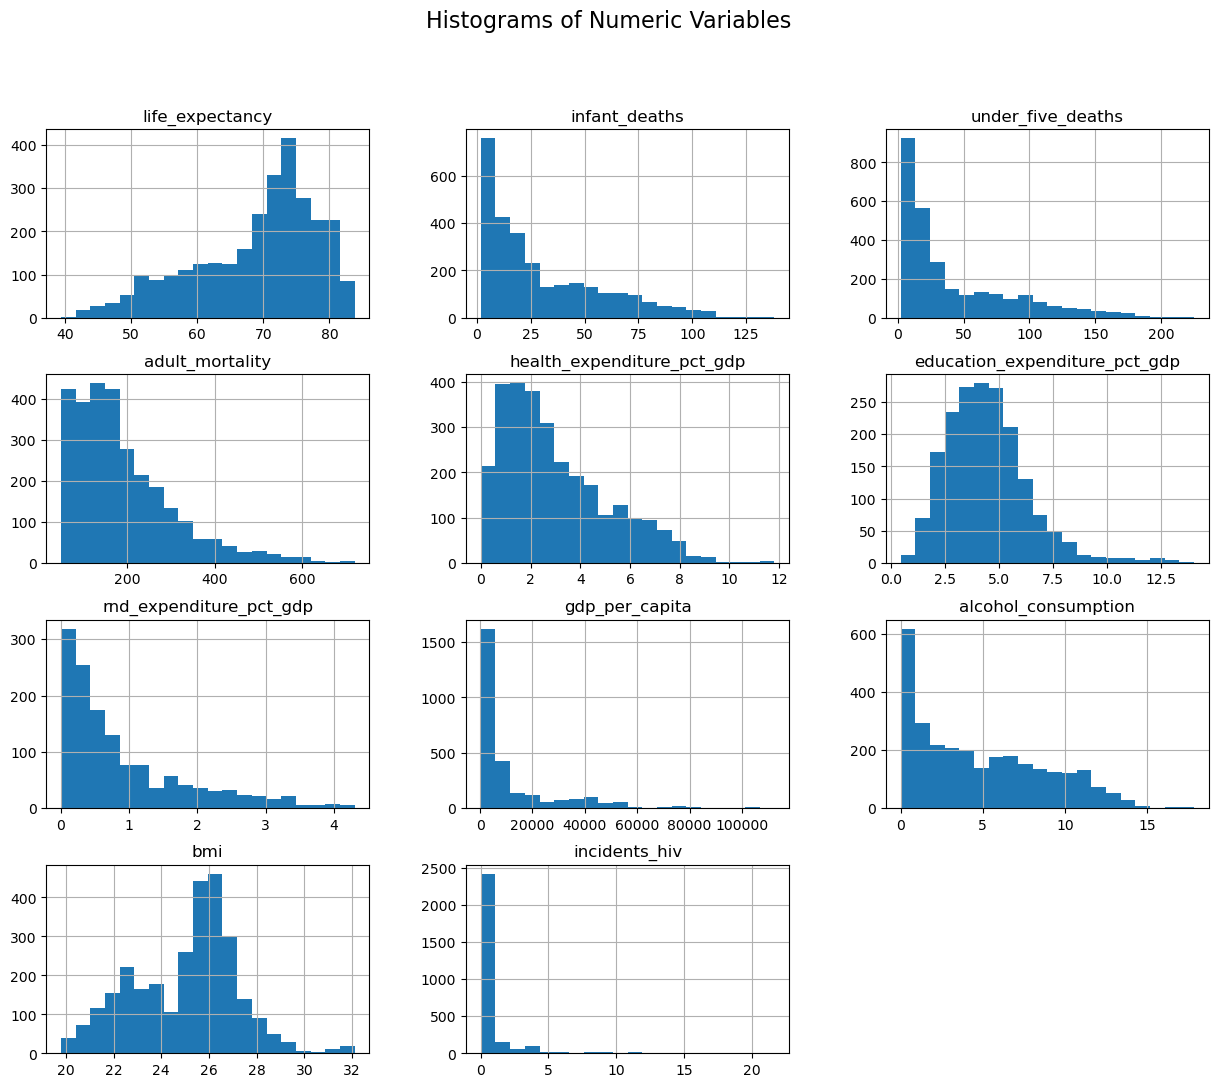

In [18]:
#plot histograms of numeric vals
#number cols
number_cols = [
    'life_expectancy', 'infant_deaths', 'under_five_deaths', 
    'adult_mortality', 'health_expenditure_pct_gdp', 
    'education_expenditure_pct_gdp', 'rnd_expenditure_pct_gdp', 
    'gdp_per_capita', 'alcohol_consumption', 'bmi', 'incidents_hiv'
]

# histograms
imputed_df[number_cols].hist(bins=20, figsize=(15,12), layout=(4,3))
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

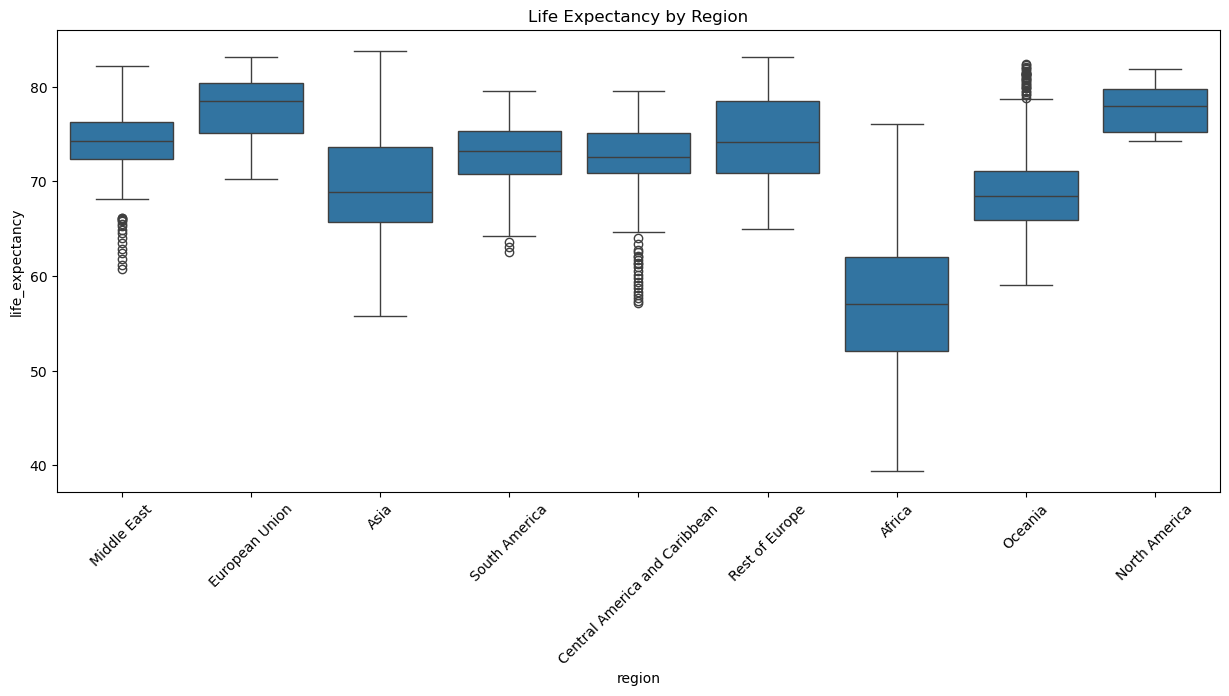

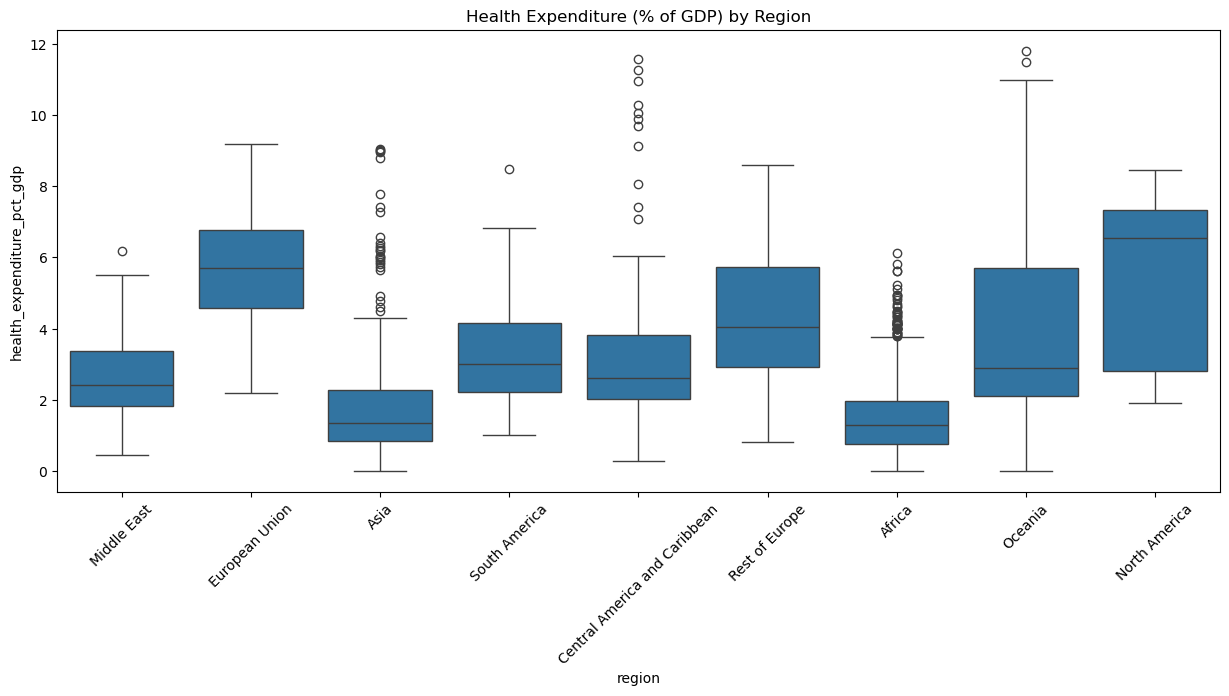

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x='region', y='life_expectancy', data=imputed_df)
plt.xticks(rotation=45)
plt.title("Life Expectancy by Region")
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(x='region', y='health_expenditure_pct_gdp', data=imputed_df)
plt.xticks(rotation=45)
plt.title("Health Expenditure (% of GDP) by Region")
plt.show()

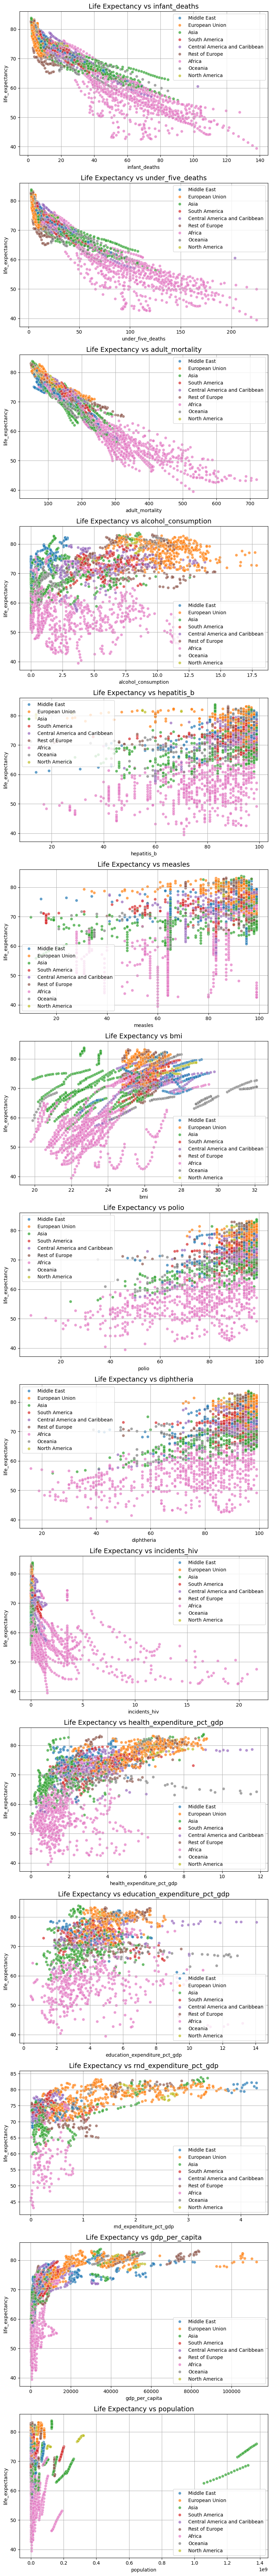

In [20]:
# Select numeric columns in imputed_df, excluding 'life_expectancy'
numeric_cols = imputed_df.select_dtypes(include='number').columns.tolist()
x_vars = [col for col in numeric_cols if col != 'life_expectancy' and col!= "year"]

# Set up the figure: one subplot per numeric variable
fig, axes = plt.subplots(len(x_vars), 1, figsize=(8, 5*len(x_vars)))

# Loop over numeric variables
for ax, col in zip(axes, x_vars):
    sns.scatterplot(
        data=imputed_df,
        x=col,
        y='life_expectancy',
        hue='region',       # color points by region
        palette='tab10',
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f'Life Expectancy vs {col}', fontsize=14)
    ax.grid(True)
    ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

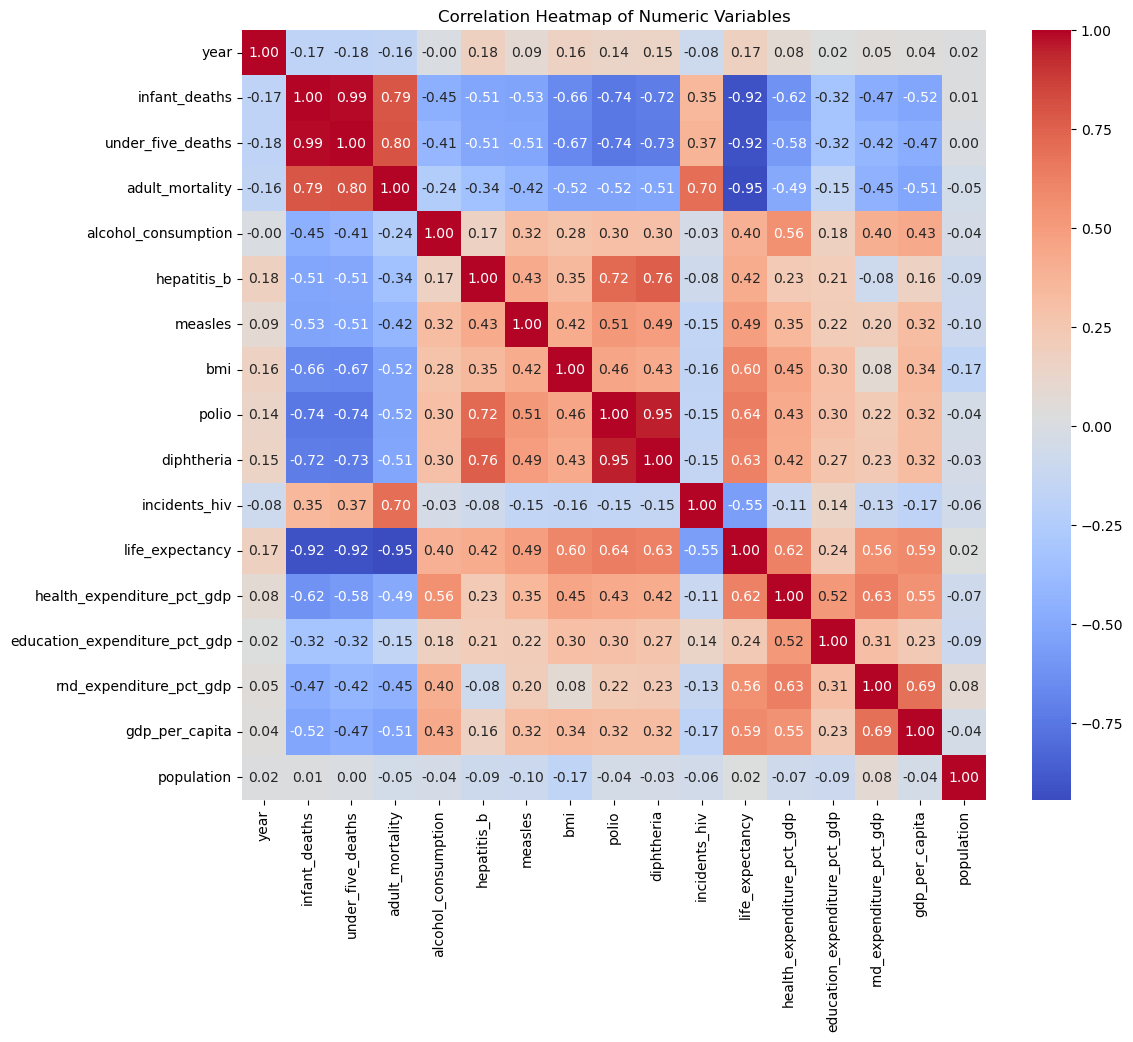

In [21]:
#correlation heatmap
plt.figure(figsize=(12,10))
corr = imputed_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [ ]:
#encoded_df.to_csv("/Users/lukehudak/MSU/FS25/CMSE 830/encoded_df.csv", index=False)

In [ ]:
#merged_df.to_csv("/Users/lukehudak/MSU/FS25/CMSE 830/merged_df.csv", index=False)